In [1]:
import matplotlib
%matplotlib inline

import numpy as np, matplotlib as mpl
import PreFRBLE
from PreFRBLE.convenience import *
from PreFRBLE.plot import *
from PreFRBLE.likelihood import *
from PreFRBLE.physics import *

from time import time
from tqdm import tqdm

In [16]:
scenario = {
    'IGM' : ['primordial'],
    'Host' : ['Rodrigues18/smd'],
    'Inter' : ['Rodrigues18'],
    'Local' : ['Piro18/wind'],
}

models_IGMF = [  ## test with limited set of IGMF models
    'alpha1-3rd',
    'alpha3-3rd',
    'alpha9-3rd',
]

scenario1 = {
    'IGM' : ['alpha1-3rd'],
    'Host' : ['Rodrigues18/smd'],
    'Inter' : ['Rodrigues18'],
    'Local' : ['Piro18/wind'],
}

scenario0 = {
    'IGM' : ['alpha3-3rd'],
    'Host' : ['Rodrigues18/smd'],
    'Inter' : ['Rodrigues18'],
    'Local' : ['Piro18/wind'],
}

scenario9 = {
    'IGM' : ['alpha9-3rd'],
    'Host' : ['Rodrigues18/smd'],
    'Inter' : ['Rodrigues18'],
    'Local' : ['Piro18/wind'],
}


scenario_IGM = {
    'IGM' : ['primordial'],
}

scenario_IGM0 = {
    'IGM' : ['alpha9-3rd'],
}

estimated redshift evolution of average |RM| in realistic scenarios with prominent models of IGMF, as well as a strong IGMF model alone (red). The IGMF model in the latter case is identical to the on used for the blue graph. The additional contribution of host galaxy and local environment lower the average |RM|.

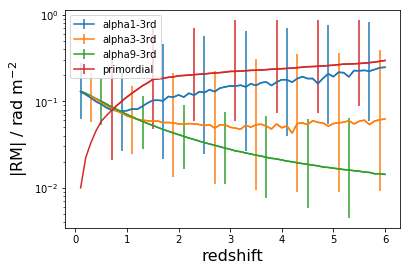

In [6]:
fig, ax = plt.subplots()
for i_s, scena in enumerate([scenario1, scenario0, scenario9, scenario_IGM]):
    PlotAverageEstimate( measure='RM', scenario=scena, ax=ax, label=scena['IGM'][0], errorevery=8, errorstart=2*i_s )
plt.legend()

investigate capability of FRBs with RM to constrain integralactic magnetic fields

In [20]:
from PreFRBLE.sample import FakeFRBs

telescope = 'CHIME'
population = 'SMD'

t0 = time()

### produce fake data
FRBs = FakeFRBs( N=500, measures=['DM','RM'], measureable=False, telescope=telescope, population=population, **scenario9 )



investigate sample

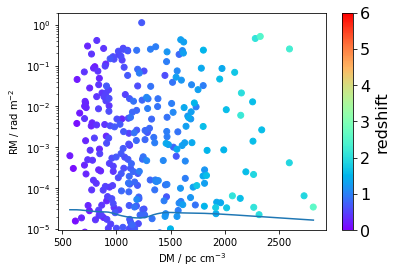

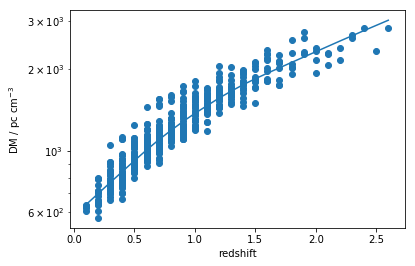

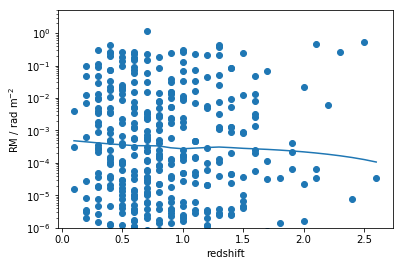

In [21]:
from statsmodels.nonparametric.smoothers_lowess import lowess

### scatter plot 
plt.scatter( FRBs['DM'], FRBs['RM'], c=Rainbow(FRBs['redshift'], min=0, max=6), cmap=rainbow )
Colorbar(x=redshift_range, label='redshift')

a = lowess( np.log10(FRBs['RM']), np.log10(FRBs['DM']) )
plt.plot( 10.**a[:,0], 10.**a[:,1])


plt.yscale('log')
plt.xlabel( r"DM / %s" % units['DM'])
plt.ylabel( r"RM / %s" % units['RM'])
plt.show()

plt.scatter( FRBs['redshift'], FRBs['DM'], cmap=rainbow )

a = lowess( np.log10(FRBs['DM']), FRBs['redshift'])
plt.plot(a[:,0], 10.**a[:,1])

plt.yscale('log')
plt.xlabel( r"redshift")
plt.ylabel( r"DM / %s" % units['DM'])
plt.show()

plt.scatter( FRBs['redshift'], FRBs['RM'], cmap=rainbow )

a = lowess( FRBs['RM'], FRBs['redshift'])
plt.plot(a[:,0], a[:,1])

plt.yscale('log')
plt.xlabel( r"redshift")
plt.ylabel( r"RM / %s" % units['RM'])
plt.ylim(1e-6,5)
plt.show()

compute Bayes factor

alpha1-3rd


/data/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/PreFRBLE/likelihood.py:383: RuntimeWarning: invalid value encountered in true_divide
  result =  np.prod(L1/L2)
/data/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/PreFRBLE/likelihood.py:390: RuntimeWarning: invalid value encountered in true_divide
  return np.nanprod( L1/L2 )


1 of 501 returned NaN. Ignore in final result
alpha3-3rd
1 of 501 returned NaN. Ignore in final result
alpha9-3rd
1 of 501 returned NaN. Ignore in final result


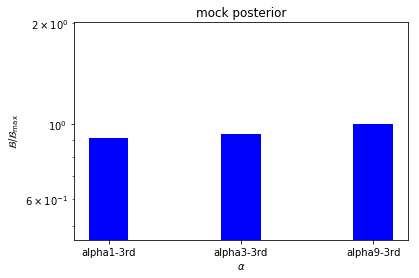

In [22]:

Bs = []
#for model in models_IGM[3:]:
for model in models_IGMF:
    print( model )
    scenario_tmp = scenario0.copy()
    scenario_tmp = scenario_IGM.copy()
    scenario_tmp['IGM'] = [model]
    Bs.append( BayesFactorCombined( DMs=FRBs['DM'], RMs=FRBs['RM'], scenario1=scenario_tmp, scenario2=scenario_IGM, population=population, telescope=telescope ) )
Bs = np.array( Bs )
    
### Plot
PlotBayes( x=models_IGMF,  y=Bs, label=r"$\alpha$", title='mock posterior', width=0.3 )
